# Graded Challenge 2 - Phase 1
Graded  Challenge  ini  dibuat  guna  mengevaluasi pembelajaran  pada  Hacktiv8  Data  Science  Fulltime Program  khususnya  pada  konsep Classificationterutama Logistic Regression dan SVM..

# Introduction
- Nama: Harun Hawari Ash Shiddiq
- Dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package
- Objective: 
    - Mampu memahami konsep Classification dengan Logistic Regression dan SVM.
    - Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM.
    - Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi.

# Import Libary

In [47]:
# Packages for Cleaning and Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

# Packages for Feature Engineering and Preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
#from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Packages for Machine Learning and Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Packages for Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
#from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [48]:
df = pd.read_csv('weatherAUS.csv')
pd.set_option('display.max.columns', None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


# Data Cleaning

In [51]:
missing = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(df)).round(2)*100
missing

,No. of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


In [52]:
missing['% missing_values']>5

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
Name: % missing_values, dtype: bool

**Missing value lebih dari 5% akan di input dengan mean/median sesuai dengan distribusi dan skewness value**

In [53]:
df_missing = df[['Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','Pressure9am','Pressure3pm'
                , 'Cloud9am', 'Cloud3pm']]
df_missing_numerik = df_missing.select_dtypes('number').columns.tolist()
df_missing_kategori = df_missing.select_dtypes('object').columns.tolist()
print('missing numerik :{}'.format(df_missing_numerik))
print('missing kategori :{}'.format(df_missing_kategori))

missing numerik :['Evaporation', 'Sunshine', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
missing kategori :['WindGustDir', 'WindDir9am']


**Skewness value kurang dari +- 0.5 masih berdistibusi normal input dengan mean sisanya dengan median, untuk kategori input dengan modusnya**

In [54]:
for i in df_missing_numerik:
    print('Skewness Value',i ,':' , df[i].skew()) 

Skewness Value Evaporation : 3.7612860111420643
Skewness Value Sunshine : -0.4964800381328167
Skewness Value WindGustSpeed : 0.8748788780303394
Skewness Value Pressure9am : -0.09552363669451734
Skewness Value Pressure3pm : -0.04562140480119886
Skewness Value Cloud9am : -0.229081832248417
Skewness Value Cloud3pm : -0.22638434607149094


In [55]:
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)

In [56]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)

**Cek distribusi missing value**

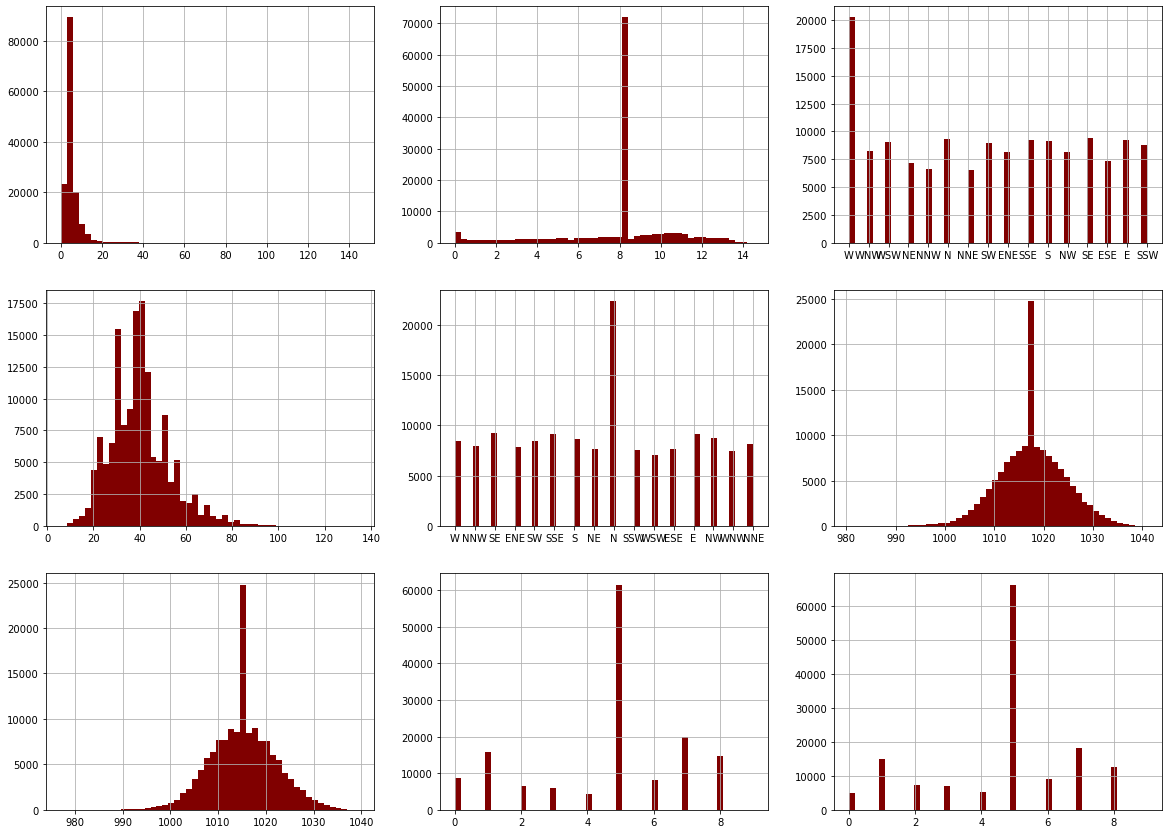

In [57]:
plt.figure(figsize=(20,20))
df['Evaporation'].hist(bins=50, ax= plt.subplot(4, 3, 1), color='maroon')
df['Sunshine'].hist(bins=50, ax= plt.subplot(4, 3, 2), color='maroon')
df['WindGustDir'].hist(bins=50, ax= plt.subplot(4, 3, 3), color='maroon')
df['WindGustSpeed'].hist(bins=50, ax= plt.subplot(4, 3, 4), color='maroon')
df['WindDir9am'].hist(bins=50, ax= plt.subplot(4, 3, 5), color='maroon')
df['Pressure9am'].hist(bins=50, ax= plt.subplot(4, 3, 6), color='maroon')
df['Pressure3pm'].hist(bins=50, ax= plt.subplot(4, 3, 7), color='maroon')
df['Cloud9am'].hist(bins=50, ax= plt.subplot(4, 3, 8), color='maroon')
df['Cloud3pm'].hist(bins=50, ax= plt.subplot(4, 3, 9), color='maroon')
plt.show()

**Missing value kurang dari 5% akan di drop**

In [58]:
df.dropna(inplace=True)

**Sesuaikan tipe data datetime menjadi datetime[ns]**

In [59]:
df['Date'].head(1)

0    2008-12-01
Name: Date, dtype: object

In [60]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [61]:
df['Date'].head(1)

0   2008-12-01
Name: Date, dtype: datetime64[ns]

**Periksa data duplikasi**

In [62]:
print('Is there any duplication of data: {}'.format(df.duplicated().any()))
print('Amount of data duplication: {}'.format(df.duplicated().sum()))

Is there any duplication of data: False
Amount of data duplication: 0


In [63]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


**Hapus data duplikasi**

In [64]:
df.drop_duplicates(inplace=True)
print('Is there any duplication of data: {}'.format(df.duplicated().any()))
print('Amount of data duplication: {}'.format(df.duplicated().sum()))

Is there any duplication of data: False
Amount of data duplication: 0


# Explorasi Data

**Cek komposisi label**

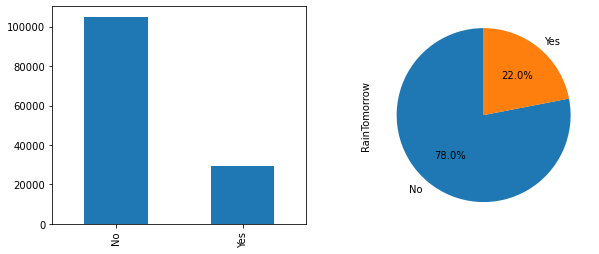

In [65]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
df['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])
plt.show()

**Cek korelasi tiap feature**

In [20]:
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')
col_num = df_num.columns.tolist()
col_cat = df_cat.columns.tolist()
print('numerical colomns : {}'.format(col_num))
print('========')
print('categorical colomns : {}'.format(col_cat))

numerical colomns : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
categorical colomns : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [72]:
df_corr

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,41,3.5,21.8,0.0,4.8,8.4,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
145455,2017-06-21,41,2.8,23.4,0.0,4.8,8.4,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,2017-06-22,41,3.6,25.3,0.0,4.8,8.4,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,2017-06-23,41,5.4,26.9,0.0,4.8,8.4,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


In [21]:
encoder = LabelEncoder()
for i in col_cat:
    df_cat[i] = encoder.fit_transform(df_cat[i])

In [22]:
df_corr = pd.merge(df_cat, df_num, left_index=True, right_index=True) 

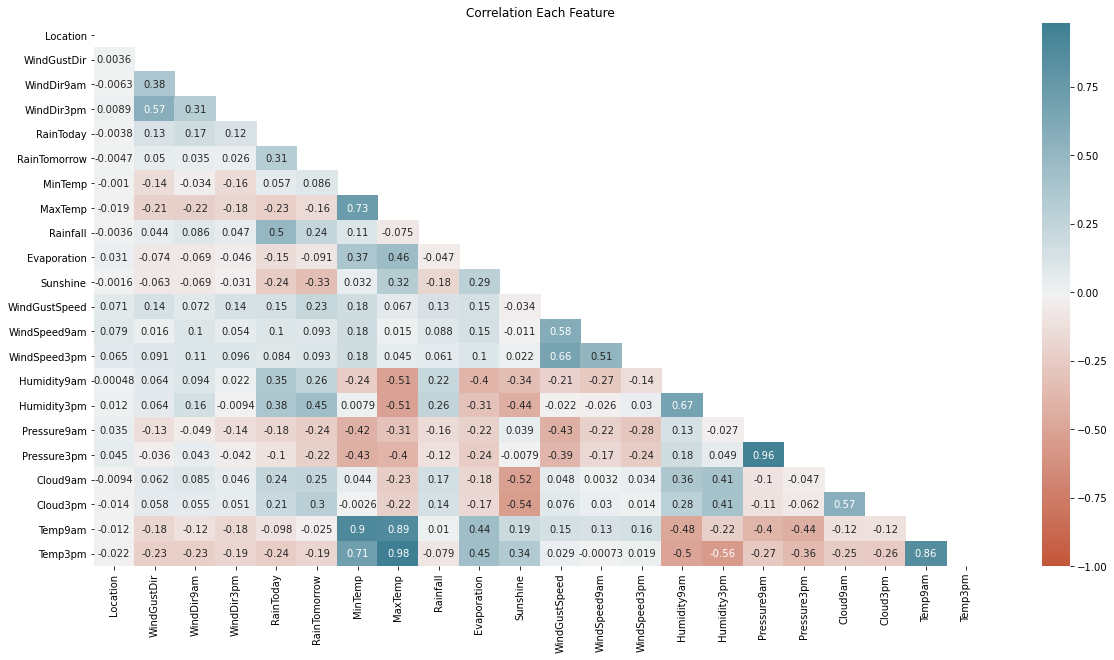

In [23]:
corr_matrix = np.triu(df_corr.corr())
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_corr.corr(), cmap=sns.diverging_palette(20, 220, as_cmap=True), mask=corr_matrix, vmin=-1, annot=True)
plt.title('Correlation Each Feature');

**Cek korelasi label terhadap feature**

In [24]:
corr=df_corr.corr()
corr['RainTomorrow'].sort_values()

Sunshine        -0.333464
Pressure9am     -0.236837
Pressure3pm     -0.218389
Temp3pm         -0.191993
MaxTemp         -0.157654
Evaporation     -0.091455
Temp9am         -0.024984
Location        -0.004728
WindDir3pm       0.026165
WindDir9am       0.034955
WindGustDir      0.050254
MinTemp          0.086311
WindSpeed9am     0.092757
WindSpeed3pm     0.093219
WindGustSpeed    0.229546
Rainfall         0.237146
Cloud9am         0.248614
Humidity9am      0.256487
Cloud3pm         0.299556
RainToday        0.311064
Humidity3pm      0.446914
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

**Cek distribusi data kategori**

In [25]:
df2 = df.copy()
df2_num = df2.select_dtypes('number')
df2_cat = df2.select_dtypes('object')
col_num2 = df2_num.columns.tolist()
col_cat2 = df2_cat.columns.tolist()
print(col_cat2)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


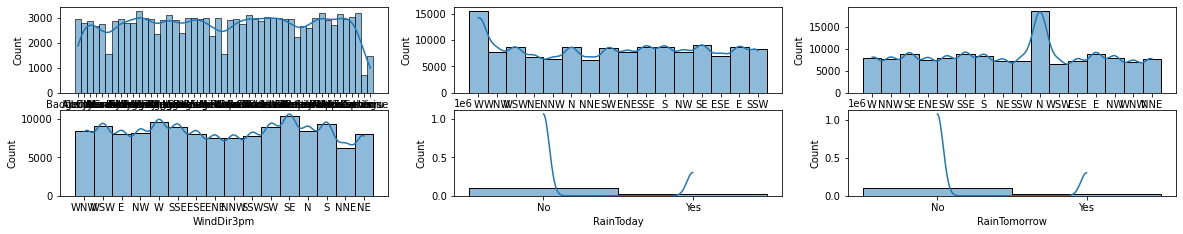

In [77]:
plt.figure(figsize=(20,30))
for i, col_cat2 in enumerate(df2_cat):
    ax = plt.subplot(16, 3, i+1)
    sns.histplot(data=df2_cat, x=col_cat2, kde=True ,ax=ax)
plt.show()

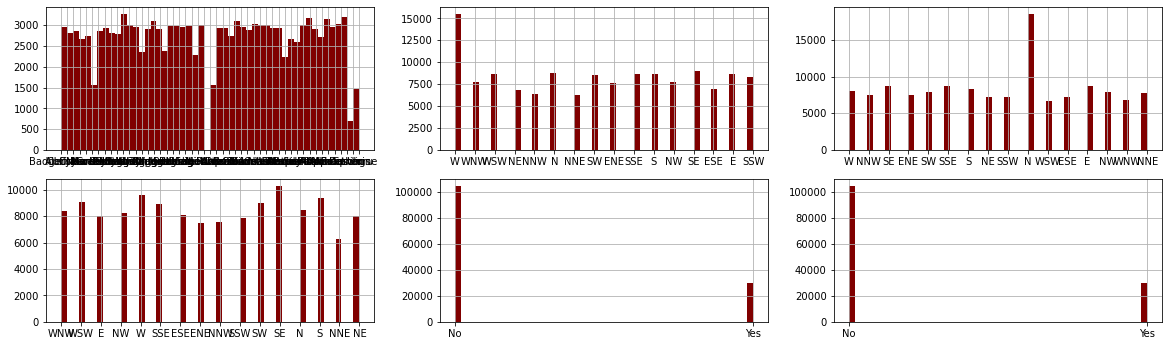

In [26]:
plt.figure(figsize=(20,50))
df2_cat['Location'].hist(bins=50, ax= plt.subplot(16, 3, 1), color='maroon')
df2_cat['WindGustDir'].hist(bins=50, ax= plt.subplot(16, 3, 2), color='maroon')
df2_cat['WindDir9am'].hist(bins=50, ax= plt.subplot(16, 3, 3), color='maroon')
df2_cat['WindDir3pm'].hist(bins=50, ax= plt.subplot(16, 3, 4), color='maroon')
df2_cat['RainToday'].hist(bins=50, ax= plt.subplot(16, 3, 5), color='maroon')
df2_cat['RainTomorrow'].hist(bins=50, ax= plt.subplot(16, 3, 6), color='maroon')
plt.show()

**Cek distribusi data numerik**

In [27]:
print(col_num2)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


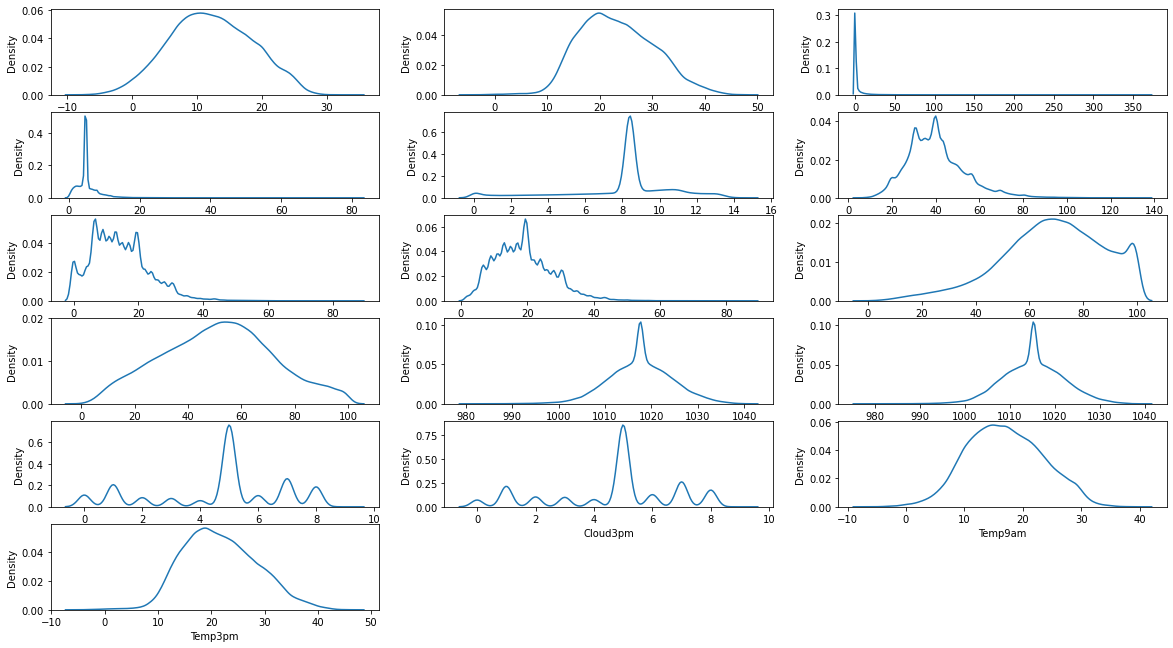

In [28]:
plt.figure(figsize=(20,30))
for i, col_num2 in enumerate(df2_num):
    ax = plt.subplot(16, 3, i+1)
    sns.kdeplot(df2_num[col_num2], ax=ax)
plt.show()

**Cek outlier berdasarkan boxplot(IQR=+-1.5)**

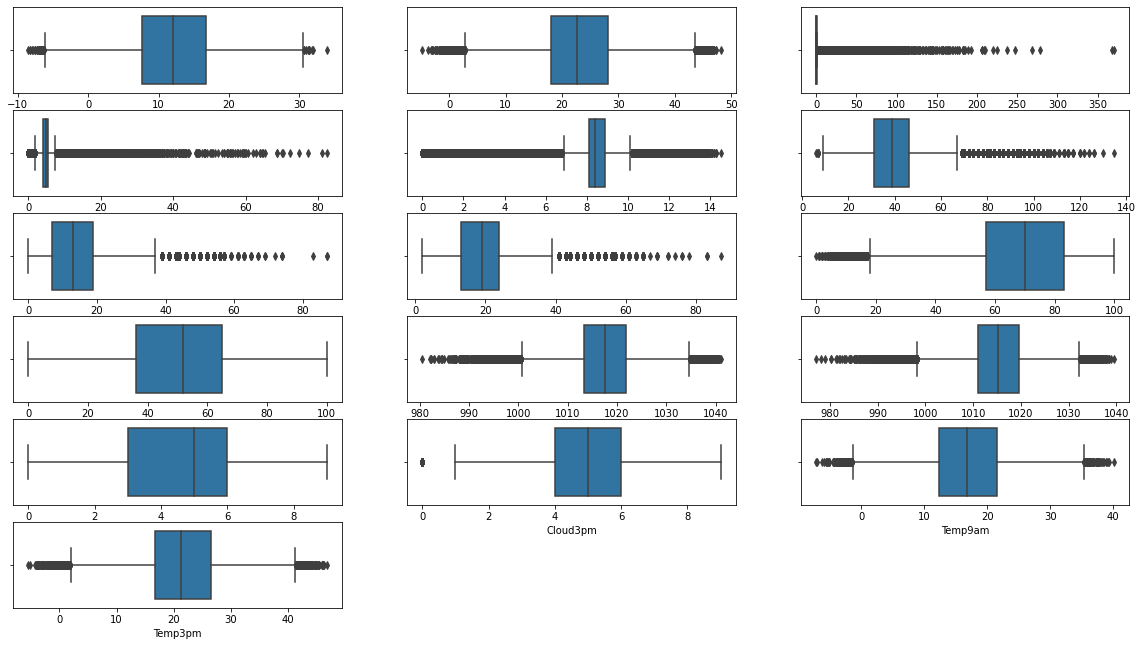

In [29]:
plt.figure(figsize=(20,30))
for i, col_num2 in enumerate(df2_num):
    ax = plt.subplot(16, 3, i+1)
    sns.boxplot(x=df2[col_num2])

**Melihat perbandingan data**

In [30]:
df_date = df.copy()
df_date['Year'] = df_date['Date'].dt.year
df_date = df_date.groupby('Year').sum()

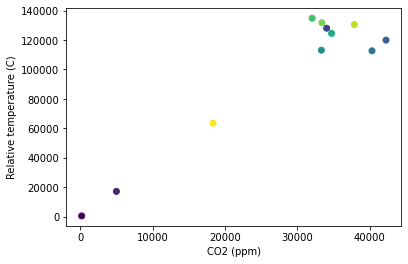

In [31]:
fig, ax = plt.subplots()
ax.scatter(df_date["Rainfall"],df_date["Sunshine"],c=df_date.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")
plt.show()

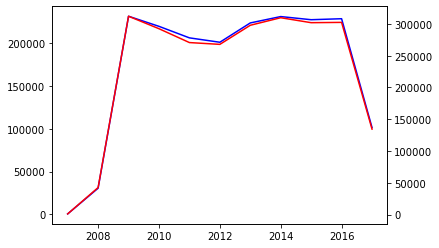

In [32]:
fig, ax = plt.subplots()
ax.plot(df_date.index, df_date['WindSpeed9am'], color='blue')
ax2 = ax.twinx()
ax2.plot(df_date.index, df_date['WindSpeed3pm'], color='red')
plt.show()

In [33]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

**Perbandinga kecapatan angin 9am dan 3pm dengan skala masing-masing**

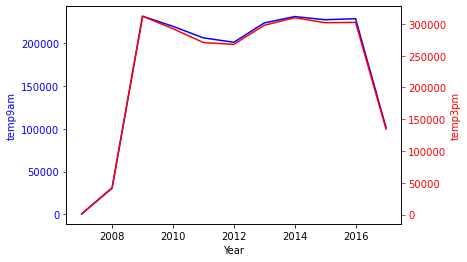

In [34]:
fig, ax = plt.subplots()
plot_timeseries(ax, df_date.index, df_date["WindSpeed9am"], "blue", "Year", "temp9am")
ax2 = ax.twinx()
plot_timeseries(ax2, df_date.index, df_date["WindSpeed3pm"], "red", "Year", "temp3pm")
plt.show()

**Perbandinga kecapatan angin 9am dan 3pm**

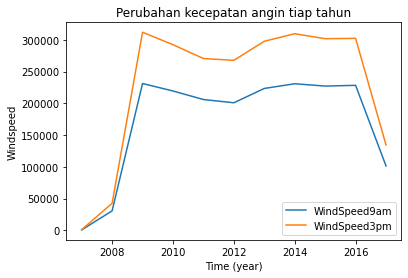

In [35]:
fig, ax = plt.subplots()
ax.plot(df_date.index, df_date["WindSpeed9am"],label='WindSpeed9am')
ax.plot(df_date.index, df_date["WindSpeed3pm"],label='WindSpeed3pm')
ax.set_xlabel('Time (year)')
ax.set_ylabel('Windspeed')
ax.set_title('Perubahan kecepatan angin tiap tahun')
ax.legend()
plt.show()

**Perbandinga tekanan dan awan dalam tahun**

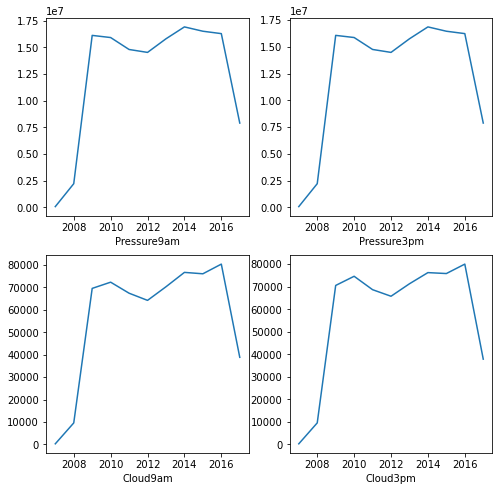

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax[0,0].plot(df_date.index, df_date['Pressure9am'])
ax[0,0].set_xlabel('Pressure9am')
ax[0,1].plot(df_date.index, df_date['Pressure3pm'])
ax[0,1].set_xlabel('Pressure3pm')
ax[1,0].plot(df_date.index, df_date['Cloud9am'])
ax[1,0].set_xlabel('Cloud9am')
ax[1,1].plot(df_date.index, df_date['Cloud3pm'])
ax[1,1].set_xlabel('Cloud3pm')
plt.show()

**Perbandingan distribusi min,max temp**

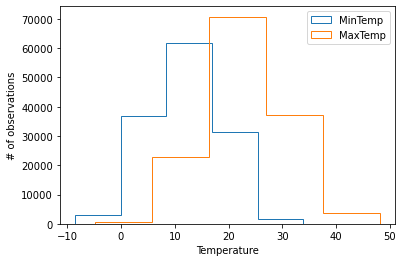

In [37]:
fig, ax = plt.subplots()
ax.hist(df['MinTemp'], histtype='step', bins=5, label='MinTemp')
ax.hist(df['MaxTemp'], histtype='step', bins=5,label='MaxTemp')
ax.set_xlabel("Temperature")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

**Perbandingan curah hujan, penguapan, dan cahaya matahri**

In [38]:
df_location = df.groupby(df['Location']).sum()

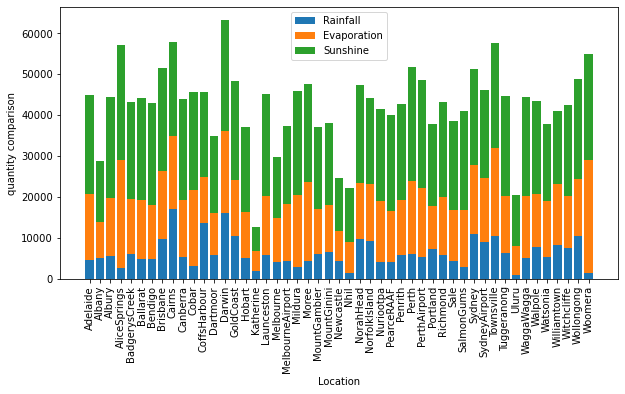

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df_location.index, df_location['Rainfall'], label='Rainfall')
ax.bar(df_location.index, df_location['Evaporation'], bottom=df_location['Rainfall'], label='Evaporation')
ax.bar(df_location.index, df_location['Sunshine'], bottom=df_location['Rainfall']+df_location['Evaporation'], label='Sunshine')
ax.set_xlabel('Location')
ax.set_xticklabels(df_location.index, rotation=90)
ax.set_ylabel("quantity comparison")
ax.legend()
plt.show()

# Data Preprocessing

**Pada tahap ini saya akan menentukan feature apa saja yang akan digunakan dalam memprediksi raintomorrow. Metode yang digunakan untuk feature numerik berdasarkan value variance inflation factor sedangkan feature kategori based logic**

In [40]:
X1 = df.copy()
X1.drop(['RainTomorrow'], inplace=True, axis=1) # Drop target
X1 = X1.select_dtypes(include=np.number)
vif_df = pd.DataFrame()
vif_df["Feature"] = X1.columns
vif_df["VIF"] = [vif(X1.values, i) for i in range(len(X1.columns))]
vif_df

,Feature,VIF
0,MinTemp,42.452623
1,MaxTemp,522.398523
2,Rainfall,1.235110
3,Evaporation,5.150775
4,Sunshine,16.122465
5,WindGustSpeed,22.859472
6,WindSpeed9am,6.509264
7,WindSpeed3pm,11.348494
8,Humidity9am,56.762594
9,Humidity3pm,44.569310


**Hapus feature high multicollinearity yaitu nilai multicollinearity lebih dari 5 karena semakin tinggi tingkat multicol semakin besar pula juga kemungkinan feature redundant** 

In [41]:
X2 = X1.copy()
delete = ['Pressure9am','Pressure3pm','Temp9am','Temp3pm','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm']
X2.drop(delete, inplace=True, axis=1)
vif_df = pd.DataFrame()
vif_df["Feature"] = X2.columns
vif_df["VIF"] = [vif(X2.values, i) for i in range(len(X2.columns))]
vif_df

,Feature,VIF
0,MinTemp,12.383827
1,MaxTemp,29.486051
2,Rainfall,1.154735
3,Evaporation,4.913691
4,Sunshine,10.473195
5,WindGustSpeed,18.435280
6,WindSpeed9am,5.867954
7,WindSpeed3pm,10.851374


**Untuk feature kategori untuk memprediksi RainTomorrow yang berpengaruh adalah feature Location, RainToday dan RainToday dengan asumsi arah angin tidak memiliki pengaruh terhadap prediksi**

In [42]:
df2_cat.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


**Feature selection berdasarkan vif dan data understanding**

In [43]:
data = df.copy()
del_feature = ['RainTomorrow','Date','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm'
              ,'WindGustDir','WindDir9am','WindDir3pm']
X = data.drop(del_feature, axis=1)
y = data['RainTomorrow']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [76]:
X_train['Location'].value_counts()

Sydney              2269
Canberra            2215
Darwin              2207
Brisbane            2190
Perth               2154
Adelaide            2143
Ballarat            2141
Hobart              2140
AliceSprings        2134
Townsville          2119
MountGambier        2115
Cairns              2112
PerthAirport        2110
Bendigo             2106
MelbourneAirport    2089
Sale                2087
Mildura             2079
SydneyAirport       2078
Wollongong          2078
Tuggeranong         2072
Launceston          2068
Portland            2060
Albury              2057
WaggaWagga          2046
Woomera             2046
Watsonia            2046
Nuriootpa           2042
GoldCoast           2022
NorfolkIsland       1997
SalmonGums          1989
Cobar               1978
NorahHead           1970
BadgerysCreek       1956
Richmond            1948
Penrith             1929
Dartmoor            1912
Walpole             1907
CoffsHarbour        1896
Witchcliffe         1859
Moree               1832


In [77]:
# Define categorical columns
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['Location', 'RainToday']
Numerical columns are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']


In [78]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())                         
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
        ('numerical', num_pipeline, numerical),
        ('categorical', cat_pipeline, categorical)], remainder = 'passthrough')

# Define and Training Model

## Logistic Regression

**Disini saya mencoba modelling dengan menggunakan regularisasi lasso**

In [79]:
log = LogisticRegression(fit_intercept=True, penalty='l1', C=0.5, solver='liblinear')
log_pipeline = Pipeline([
     ('full_pipeline', full_pipeline),
     ('model', log)])
log_pipeline.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm']),
                                                 ('categorical',
                                                  Pipeline(steps=[

In [95]:
y_pred_train = log_pipeline.predict(X_train)
y_pred = log_pipeline.predict(X_test)
print('training set accuracy', accuracy_score(y_train,y_pred_train).round(2))
print('test set accuracy', accuracy_score(y_test,y_pred).round(2))

training set accuracy 0.82
test set accuracy 0.82


**Perbedaan tidak berbeda secara signifikan maka data tidak overfit**

## SVM

**Disini saya mencoba modelling dengan menggunakan kernel poly**

In [81]:
svc = SVC(kernel='poly', C=0.5, degree=4)
svc_pipeline = Pipeline([
     ('full_pipeline', full_pipeline),
     ('model', svc)])
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm']),
                                                 ('categorical',
                                                  Pipeline(steps=[

In [94]:
y_pred_train2 = svc_pipeline.predict(X_train)
y_pred2 = svc_pipeline.predict(X_test)
print('training set accuracy', accuracy_score(y_train,y_pred_train2).round(2))
print('test set accuracy', accuracy_score(y_test,y_pred2).round(2))

training set accuracy 0.82
test set accuracy 0.82


**Perbedaan tidak berbeda secara signifikan maka data tidak overfit**

# Evaluasi Model

EVALUATION MODEL LOGISTIC REGRESSION
accuracy_score: 0.82
precision_score: 0.65
recall_score: 0.37
f1_score 0.48
roc_auc_score 0.66
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     31511
           1       0.65      0.37      0.48      8866

    accuracy                           0.82     40377
   macro avg       0.75      0.66      0.68     40377
weighted avg       0.80      0.82      0.80     40377



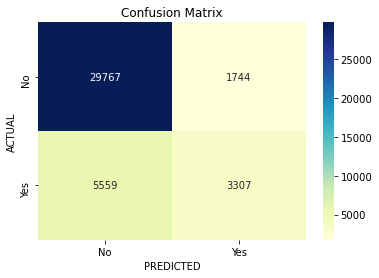

In [92]:
print('EVALUATION MODEL LOGISTIC REGRESSION')
print('accuracy_score:', accuracy_score(y_test,y_pred).round(2))
print('precision_score:', precision_score(y_test,y_pred).round(2))
print('recall_score:', recall_score(y_test,y_pred).round(2))
print('f1_score', f1_score(y_test,y_pred).round(2))
print('roc_auc_score', roc_auc_score(y_test,y_pred).round(2))
print(classification_report(y_test, y_pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='d', cmap='YlGnBu');
# labels, title
ax.set_xlabel("PREDICTED")
ax.set_ylabel("ACTUAL")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["No", "Yes"])
ax.yaxis.set_ticklabels(["No", "Yes"]);

EVALUATION MODEL SVM
accuracy_score: 0.82
precision_score: 0.65
recall_score: 0.37
f1_score 0.47524610188977506
roc_auc_score 0.66
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     31511
           1       0.65      0.37      0.48      8866

    accuracy                           0.82     40377
   macro avg       0.75      0.66      0.68     40377
weighted avg       0.80      0.82      0.80     40377



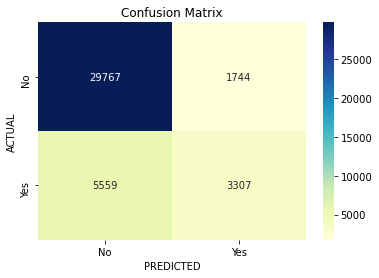

In [93]:
print('EVALUATION MODEL SVM')
print('accuracy_score:', accuracy_score(y_test,y_pred2).round(2))
print('precision_score:', precision_score(y_test,y_pred2).round(2))
print('recall_score:', recall_score(y_test,y_pred2).round(2))
print('f1_score', f1_score(y_test,y_pred2))
print('roc_auc_score', roc_auc_score(y_test,y_pred2).round(2))
print(classification_report(y_test, y_pred2))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, ax = ax, fmt='d', cmap='YlGnBu');
# labels, title and ticks
ax.set_xlabel("PREDICTED")
ax.set_ylabel("ACTUAL")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["No", "Yes"])
ax.yaxis.set_ticklabels(["No", "Yes"]);

# Model Inference

In [85]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,RainToday
104591,Nuriootpa,6.1,25.7,0.0,5.3,10.7,33.0,7.0,20.0,No
76485,Portland,8.3,13.3,13.2,0.8,1.9,63.0,24.0,41.0,Yes
77485,Portland,16.0,22.0,0.2,7.2,10.3,31.0,17.0,17.0,No
126668,SalmonGums,13.9,26.6,0.0,4.8,8.4,39.0,19.0,13.0,No
70713,Mildura,14.7,32.1,0.0,14.0,12.5,31.0,19.0,11.0,No


In [88]:
print(X_train.shape)

(94213, 10)


In [89]:
col=X_train.columns.to_list()
val=[['Portland', 5, 10, 13, 9, 8, 30, 20, 23, 'No']]
new_data=pd.DataFrame(val,columns=col)
new_data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,RainToday
0,Portland,5,10,13,9,8,30,20,23,No


In [ ]:
new_pred = log_pipeline.predict(new_data)
new_pred

# Overall Analysis
- Diketahui Label unbalance dengan rasio 78:22
- Data kebanyakan tidak berdistribusi normal
- Data masih terdapat banyak outlier sehingga dapat mempengaruhi model yang sensitif terhadap outlier
- Didapatkan korelasi terbesar adalah Humidity3pm namun berdasarkan vif Humidity3pm memiliki peluang redundant yang tinggi sehingga akan di drop
- Threshold missing value=5% untuk drop lebih dari itu akan di input mean/median

# Model Analysis
- Berdasarkan hasil variance inflation factor dan logic di gunakan 10 feature
- Pada model ini tidak dilakukan handling outlier sehingga masih ada celah untuk improvement
- Baik Logistic regression, dan svc tidak ada yang overfit
- Didapatkan nilai akurasi terbesar 0.82 bisa dibilang bagus namun karena data unbalance hal ini belum bisa dikatakan valid karena bisa jadi model hanya bagus untuk memprediksi label mayoritas saja
- Evaluasi dari logistic regression, dan svc tidak berbeda secara signifikan